In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Ch06 P.10

In [27]:
mydata = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/3600/Coffee.txt")
x = mydata[:,1]
y = mydata[:,2]
n=x.shape[0]
x1=np.c_[np.ones(n),x]
x2=np.c_[np.ones(n),x,x**2]

In [28]:
sst=sum((y-y.mean())**2)
sst

172452.66357142854

In [29]:
beta1=np.linalg.inv(x1.T @ x1) @ x1.T @ y
sse1=sum((y-x1 @ beta1)**2)
sse1

3712.020714285715

In [37]:
ixtx2 = np.linalg.inv(x2.T @ x2)
beta2=ixtx2 @ x2.T @ y
yhat2=x2 @ beta2
sse2=sum((y-yhat2)**2)
sse2

679.2204761904762

In [31]:
ssr1=sst-sse1
ssext=sse1-sse2
msext=ssext/1
mse2=sse2/(14-3)
fRatio=msext/mse2
print(ssr1,ssext,sse2,sst)
print(msext,mse2)
print(fRatio)

168740.6428571428 3032.8002380952385 679.2204761904762 172452.66357142854
3032.8002380952385 61.747316017316024
49.11630875169925


In [32]:
fa=stats.f(1,14-3).ppf(0.95)
pv=1-stats.f(1,14-3).cdf(fRatio)
print(fa,pv)

4.844335674943618 2.2451497480591165e-05


In [35]:
varBeta=mse2*ixtx2
seBeta=np.sqrt(np.diagonal(varBeta))
tBeta=beta2/seBeta
print(seBeta)
print(tBeta)

[4.85002959 3.78605314 0.6062537 ]
[103.61915175  21.23206182  -7.00830284]


In [36]:
stats.t(14-3).ppf(.975)

2.200985160082949

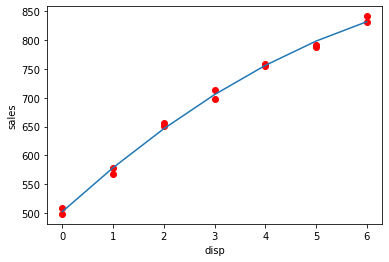

In [40]:
xinds = x.argsort()
sorted_x = x[xinds[::-1]]
sorted_yhat2 = yhat2[xinds[::-1]]

plt.plot(x, y, 'ro')
plt.plot(sorted_x,sorted_yhat2)
plt.xlabel("disp") 
plt.ylabel("sales") 
plt.show()

In [39]:
rsq=1-sse2/sst
rsq

0.9960614091883299